In [2]:
import keras
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import one_hot
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Bidirectional
from keras.layers import Dropout
from keras.layers import concatenate
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import Conv2D
from keras.layers import MaxPooling1D
from keras.layers import BatchNormalization
from keras.models import Model
from keras.layers import LeakyReLU
from keras.layers import Lambda
from keras.layers import Activation
from keras.layers import Multiply
import pandas as pd
import nltk
from nltk import tokenize
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.utils.vis_utils import plot_model
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.callbacks import ModelCheckpoint
from sklearn import preprocessing
from keras.models import load_model
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
data=pd.read_csv("/content/drive/MyDrive/IIIT_MIDAS/flipkart_com-ecommerce_sample.csv", encoding= 'unicode_escape')
print(len(data))
data.head()

20000


,product_category_tree,description,brand
0,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
1,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW
3,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
4,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons


In [4]:
category=[]
description=[]
for i in range(len(data)):
  if type(data['description'][i]) == str :
    category.append(data["product_category_tree"][i].split('>>')[0][2:-1])
    description.append(data['description'][i]) 


In [6]:
data = pd.DataFrame()
data["category"]=category
data["description"]=description
data.head()    


,category,description
0,Clothing,Key Features of Alisha Solid Women's Cycling S...
1,Furniture,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,Footwear,Key Features of AW Bellies Sandals Wedges Heel...
3,Clothing,Key Features of Alisha Solid Women's Cycling S...
4,Pet Supplies,Specifications of Sicons All Purpose Arnica Do...


Total No. of Categories : 266


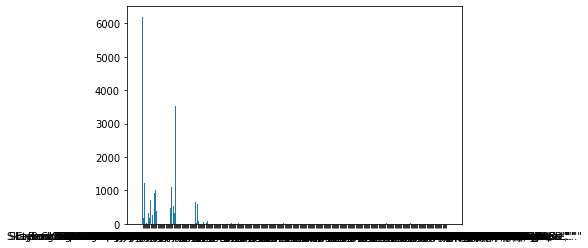

In [7]:
category_counts= Counter(category)
print(f"Total No. of Categories :",len(category_counts.keys()))
plt.bar(category_counts.keys(),category_counts.values())
plt.show() 

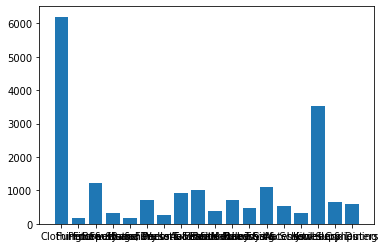

In [8]:
new_dict={}
for key, value in category_counts.items():
  if value>100:
    new_dict[key]=value
plt.bar(new_dict.keys(),new_dict.values())
plt.show() 

In [9]:
new_description=[]
new_category=[]
for i in range(len(description)):
  if category[i] in new_dict.keys():
    new_description.append(description[i])
    new_category.append(category[i])
    
new_df=pd.DataFrame()
new_df["description"]=new_description
new_df["category"]=new_category
new_df.head()

,description,category
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
1,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,Furniture
2,Key Features of AW Bellies Sandals Wedges Heel...,Footwear
3,Key Features of Alisha Solid Women's Cycling S...,Clothing
4,Key Features of Alisha Solid Women's Cycling S...,Clothing


In [10]:
lab_enc = preprocessing.LabelEncoder()
lab_enc.fit(new_df.category)
new_df['categorical_label'] = lab_enc.transform(new_df.category)
new_df.head()

,description,category,categorical_label
0,Key Features of Alisha Solid Women's Cycling S...,Clothing,4
1,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,Furniture,7
2,Key Features of AW Bellies Sandals Wedges Heel...,Footwear,6
3,Key Features of Alisha Solid Women's Cycling S...,Clothing,4
4,Key Features of Alisha Solid Women's Cycling S...,Clothing,4


In [11]:
X_train, X_test, y_train, y_test = train_test_split(new_description, np.array(new_df["categorical_label"]), test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [12]:
chartokenizer = Tokenizer(num_words=None, char_level=True, oov_token='UNK')
chartokenizer.fit_on_texts(X_train)

In [13]:
chartokenizer.word_index

{'\t': 28,
 '\n': 32,
 ' ': 2,
 '!': 48,
 '"': 51,
 '#': 56,
 '%': 52,
 '&': 49,
 "'": 38,
 '(': 44,
 ')': 43,
 '*': 55,
 '+': 60,
 ',': 26,
 '-': 29,
 '.': 22,
 '/': 50,
 '0': 27,
 '1': 30,
 '2': 35,
 '3': 33,
 '4': 39,
 '5': 36,
 '6': 45,
 '7': 47,
 '8': 42,
 '9': 31,
 ':': 34,
 ';': 59,
 '=': 62,
 '>': 92,
 '?': 58,
 '@': 64,
 'UNK': 1,
 '[': 76,
 '\\': 84,
 ']': 75,
 '_': 53,
 '`': 83,
 'a': 4,
 'b': 21,
 'c': 12,
 'd': 13,
 'e': 3,
 'f': 17,
 'g': 20,
 'h': 14,
 'i': 8,
 'j': 40,
 'k': 24,
 'l': 11,
 'm': 18,
 'n': 9,
 'o': 5,
 'p': 15,
 'q': 46,
 'r': 7,
 's': 10,
 't': 6,
 'u': 16,
 'v': 25,
 'w': 23,
 'x': 37,
 'y': 19,
 'z': 41,
 '{': 81,
 '|': 63,
 '}': 82,
 '~': 79,
 '\x80': 72,
 '\x85': 69,
 '\x91': 80,
 '\x92': 57,
 '\x93': 67,
 '\x94': 66,
 '\x95': 61,
 '\x96': 68,
 '\x97': 87,
 '\x99': 77,
 '\x9c': 90,
 '\x9d': 91,
 '\xa0': 54,
 '¡': 78,
 '¢': 73,
 '®': 74,
 '¯': 85,
 '°': 70,
 '±': 95,
 '·': 88,
 'º': 96,
 '¾': 94,
 'â': 71,
 'ã': 86,
 'è': 89,
 'é': 65,
 'ñ': 93}

In [14]:
# Convert string to index
X_train = chartokenizer.texts_to_sequences(X_train)
X_val = chartokenizer.texts_to_sequences(X_val)
X_test = chartokenizer.texts_to_sequences(X_test)



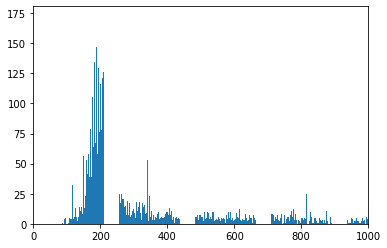

In [15]:
df=X_train
length=[]
for i in range(len(df)) :
  #if len(df[i])!=0:
  length.append(len(df[i]))
c= Counter(length)
plt.bar(c.keys(),c.values())
plt.xlim(0,1000)
plt.show() 

In [16]:
vocab_size=len(chartokenizer.word_index)

In [17]:
# Padding
X_train = pad_sequences(X_train, maxlen=512, padding='post')
X_val = pad_sequences(X_val, maxlen=512, padding='post')
X_test = pad_sequences(X_test, maxlen=512, padding='post')

# Convert to numpy array
X_train = np.array(X_train, dtype='float32')
X_val = np.array(X_val, dtype='float32')
X_test = np.array(X_test, dtype='float32')

In [19]:
embeddings_weights = []
embeddings_weights.append(np.zeros(vocab_size))

for char, i in chartokenizer.word_index.items() :
  onehotss = np.zeros(vocab_size)
  onehotss[i-1]=1
  embeddings_weights.append(onehotss)
embeddings_weights = np.array(embeddings_weights)  
print(embeddings_weights)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [41]:
model = keras.Sequential()
model.add(Input(shape=(512,)))
model.add(Embedding(vocab_size+1,vocab_size,input_length=512,weights=[embeddings_weights]))
n_filters=[128,256,256]
filter_size=[9,7,5]
for i in range(3):
  model.add(Conv1D(n_filters[i],filter_size[i],padding='same',activation='relu'))
  model.add(BatchNormalization())
  #model.add(Conv1D(n_filters[i],filter_size[i],padding='same',activation='relu'))
  #model.add(BatchNormalization())
  model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.4)) 
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(18,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])  
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 512, 96)           9312      
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 512, 128)          110720    
_________________________________________________________________
batch_normalization_27 (Batc (None, 512, 128)          512       
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 170, 128)          0         
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 170, 256)          229632    
_________________________________________________________________
batch_normalization_28 (Batc (None, 170, 256)          1024      
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 56, 256)          

In [42]:
model.fit(x=X_train, y=np.array(y_train), validation_data=(X_val,np.array(y_val)), batch_size=64, epochs = 15)

Epoch 1/15
211/211 [==============================] - 8s 31ms/step - loss: 2.6110 - accuracy: 0.3663 - val_loss: 32.9027 - val_accuracy: 0.1959
Epoch 2/15
211/211 [==============================] - 6s 29ms/step - loss: 1.1207 - accuracy: 0.6625 - val_loss: 28.6009 - val_accuracy: 0.1959
Epoch 3/15
211/211 [==============================] - 6s 29ms/step - loss: 0.7752 - accuracy: 0.7626 - val_loss: 1.8791 - val_accuracy: 0.6489
Epoch 4/15
211/211 [==============================] - 6s 30ms/step - loss: 0.4881 - accuracy: 0.8481 - val_loss: 0.5742 - val_accuracy: 0.8369
Epoch 5/15
211/211 [==============================] - 6s 30ms/step - loss: 0.3764 - accuracy: 0.8855 - val_loss: 0.5060 - val_accuracy: 0.8538
Epoch 6/15
211/211 [==============================] - 6s 30ms/step - loss: 0.2642 - accuracy: 0.9173 - val_loss: 0.4221 - val_accuracy: 0.8801
Epoch 7/15
211/211 [==============================] - 6s 30ms/step - loss: 0.1957 - accuracy: 0.9418 - val_loss: 0.5648 - val_accuracy: 0.85

In [43]:
#training Char level CNN
print('For Char CNN')
y=model.predict(X_test)
y_pred = np.argmax(y,axis=1)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred,average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred,average='macro')
print('F1 score: %f' % f1)

For Char CNN
Accuracy: 0.931905
Precision: 0.850635
Recall: 0.857766
F1 score: 0.846252


In [ ]:
description

Text(0.5, 1.0, 'CONFUSION MATRIX - char CNN')

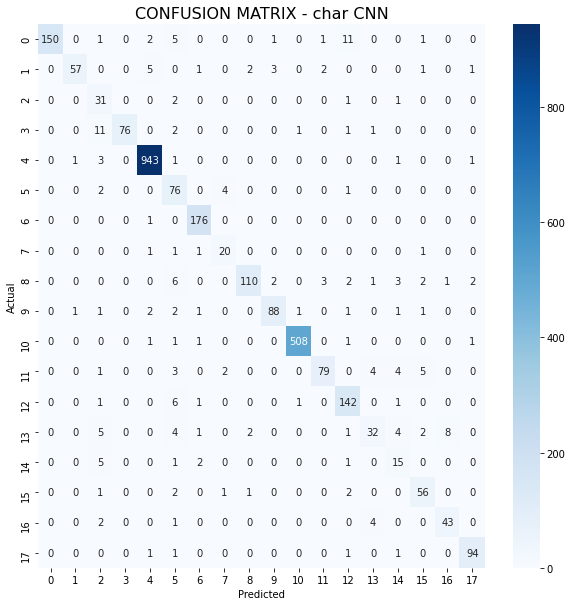

In [44]:
conf_mat = confusion_matrix(lab_enc.inverse_transform(y_test), lab_enc.inverse_transform(y_pred))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - char CNN", size=16)